                            Clusterização Hierarquica

-> A clusterização hierárquica é um método de agrupamento não supervisionado
que constrói uma estrutura de árvore dos dados, chamada dendrograma.

-> Ao contrário do k-means, que exige que você defina o numero exato de
clusters (k) no inicio, a clusterização hierarquica permite que você veja
como os clusters se formam em diferentes niveis de similiaridade. Existem
dois tipos principais, mas o mais comum e fácil de entender é o aglomerativo.


                    Clusterização Hierarquica (Método "Bottom-up")

-> Este método é o mais utilizado e segue uma lógica de fusão (agrupamentos
de baixo para cima):

    -> 1. Inicio(Baixo): Cada ponto de dado é tratado como seu próprio 
    cluster individual. Se você tiver 47 canais, você começa com 47 clusters.

    -> 2. Fusão: O algoritmo encontra os dois clusters (ou pontos) mais
    próximos e os funde em um único cluster.

    -> 3. Repetição: O processo se repete: o algoritmo encontra dois clusters
    mais próximos (agora pode ser um ponto e um grupo, ou dois grupos) e os 
    funde.

    -> 4. Fim (Topo): O processo continua até que todos os pontos de dados 
    tenham sido fundidos em um único grande cluster.


                        O Dendograma (o resultado visual)

-> O resultado da clusterização hierárquica não é um conjunto de rótulos
(como 0, 1, 2 no k-means), mas sim um gráfico chamado dendograma.

-> Eixo x: Representa os nossos objetos (dados)

-> Eixo y (Altura): Representa a distância ou dissimilaridade entre os
clusters que estão sendo fundidos.

                      Como o Dendograma Ajuda?

-> Para definir o número ideal de clusters, você simplesmente traça uma linha
horizontal no dendograma. Onde essa linha cruzar as linhas verticais, esse 
será o seu número de clusters.

    -> Vantagem: Permite que você visualize e escolha o K sem precisar rodar 
    um teste como o Método do Cotovelo.

Import da bilioteca pandas que permite o acesso e manipulação de datasets

In [1]:
import pandas as pd

Acessando a base de dados com o pandas

In [ ]:
# O delimiter irá especificar o tipo de sinal que separa os dados no arquivo csv
base_de_dados = pd.read_csv('Dados/svbr.csv', delimiter=';')

Visualizando as informações da base de dados

In [3]:
base_de_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Canal          47 non-null     object 
 1   Inscritos      46 non-null     float64
 2   Visualizações  46 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


Convertendo os valores e preenchendo campos nulos

In [ ]:
# Classe do módulo impute da biblioteca sklearn que tem como objetivo preencher
# dados faltantes.  
from sklearn.impute import SimpleImputer

# Imoort da biblioteca numpy que possibilita a manipulação de arrays
# e a realização de cálculos matemáticos
import numpy as np

# Import do nosso arquivo de funções.
from minhasfuncoes import funcoes

preenchimento = SimpleImputer(missing_values=np.nan, strategy='mean')

colunas_preenchidas = base_de_dados.iloc[:,1:3].values

dados_que_serao_utilizados = preenchimento.fit_transform(colunas_preenchidas)

dados_que_serao_utilizados = dados_que_serao_utilizados.astype("int")

dados_normalizados, escala = funcoes.normalizacao(dados_que_serao_utilizados)

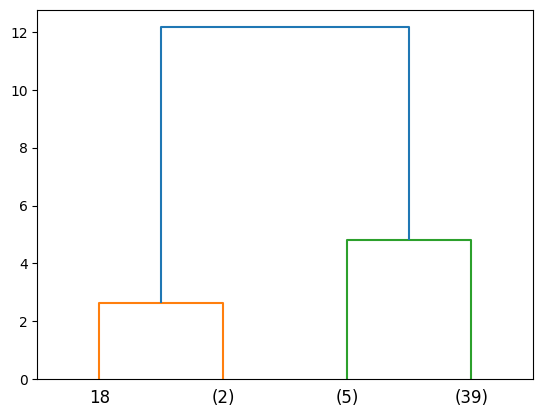

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage

import matplotlib.pyplot as plt

dendrogram(linkage(dados_normalizados, 'ward'), truncate_mode='level', p = 1)

plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering

modelo = AgglomerativeClustering(linkage="ward")

cluster = modelo.fit_predict(dados_normalizados)

base_de_dados['cluster'] = cluster

In [19]:
base_de_dados.head(47)

,Canal,Inscritos,Visualizações,cluster
0,Site Arqueologia Egípcia,13438.0,406590.0,0
1,Terra Negra,35241.0,868235.0,0
2,Frank Jaava,31680.0,2856508.0,0
3,Dispersciência,25100.0,150000.0,0
4,Olá Ciência,32788.0,1575456.0,0
5,A matemaníaca por Julia Jaccoud,65453.0,1667892.0,0
6,Delta T - Os super lentos,12000.0,171361.0,0
7,Bláblálogia,161951.0,11027386.0,0
8,Efarsas,78876.0,6226235.0,0
9,Minuto da Terra,274196.0,30166457.0,0


In [22]:
apenas_0 = base_de_dados['cluster'] == 0

base_de_dados[apenas_0]

,Canal,Inscritos,Visualizações,cluster
0,Site Arqueologia Egípcia,13438.0,406590.0,0
1,Terra Negra,35241.0,868235.0,0
2,Frank Jaava,31680.0,2856508.0,0
3,Dispersciência,25100.0,150000.0,0
4,Olá Ciência,32788.0,1575456.0,0
5,A matemaníaca por Julia Jaccoud,65453.0,1667892.0,0
6,Delta T - Os super lentos,12000.0,171361.0,0
7,Bláblálogia,161951.0,11027386.0,0
8,Efarsas,78876.0,6226235.0,0
9,Minuto da Terra,274196.0,30166457.0,0


In [23]:
apenas_1 = base_de_dados['cluster'] == 1

base_de_dados[apenas_1]

,Canal,Inscritos,Visualizações,cluster
18,Matemática Rio com Prof Rafael Procópio,1423056.0,93036517.0,1
32,Canal do Pirula,752573.0,76462787.0,1
39,Schwarza - Poligonautas,860493.0,118741623.0,1


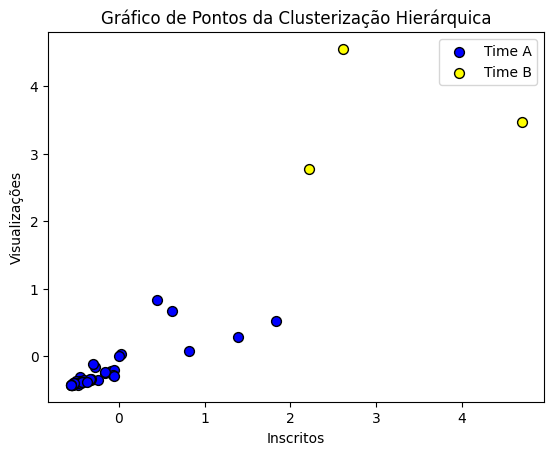

In [30]:
plt.scatter(dados_normalizados[cluster == 0, 0], dados_normalizados[cluster == 0, 1],
            
            s = 50,
            
            color = 'blue',
            
            edgecolor='black',
            
            label = 'Time A'
            
            )

plt.scatter(dados_normalizados[cluster == 1, 0], dados_normalizados[cluster == 1, 1],
            
            s = 50, 
            
            color = 'yellow',
            
            edgecolor = 'black',
            
            label = 'Time B'
            
            )

plt.title('Gráfico de Pontos da Clusterização Hierárquica')

plt.xlabel('Inscritos')

plt.ylabel('Visualizações')

plt.legend()

plt.show()